In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Loading and preprocessing the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 140s 1us/step


In [4]:
print("Training data shape: ", x_train.shape)
print("Testing data shape: ", x_test.shape)

Training data shape:  (50000, 32, 32, 3)
Testing data shape:  (10000, 32, 32, 3)


In [5]:
# Normalizing pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
# Class names for CIFAR-10 dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [8]:
#Building the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [9]:
#Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
#Training the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.3429 - loss: 1.7724 - val_accuracy: 0.5672 - val_loss: 1.2294
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5694 - loss: 1.2050 - val_accuracy: 0.6102 - val_loss: 1.1106
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6385 - loss: 1.0225 - val_accuracy: 0.6597 - val_loss: 0.9868
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6687 - loss: 0.9311 - val_accuracy: 0.6619 - val_loss: 0.9852
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.7008 - loss: 0.8498 - val_accuracy: 0.6681 - val_loss: 0.9757
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7283 - loss: 0.7797 - val_accuracy: 0.6920 - val_loss: 0.8849
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7419 - loss: 0.7330 - val_accuracy: 0.6812 - val_loss: 0.9468
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7609 -

In [11]:
#Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7089 - loss: 0.8615


In [12]:
print(f"Test Accuracy: {test_acc:.2f}")

Test Accuracy: 0.70


In [13]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


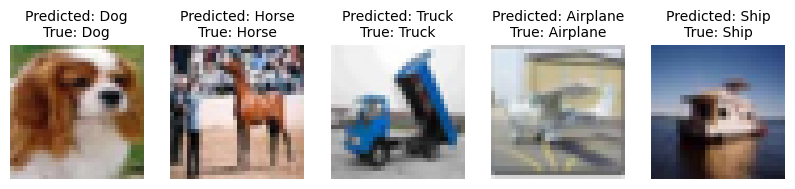

In [24]:
num_images = 5
indices = np.random.choice(len(x_test), num_images, replace=False)  

plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[idx])  
    pred_label = class_names[np.argmax(predictions[idx])] 
    true_label = class_names[y_test[idx][0]] 
    plt.title(f"Predicted: {pred_label}\nTrue: {true_label}", fontsize=10)
    plt.axis('off')  # Hide axes for better display

plt.show()
